# Python para análise de dados (Pandas)

In [1]:
#Para instalar:
#!pip3 install pandas
#Importação da biblioteca
import pandas as pd

In [53]:
#!pip3 install openpyxl
#Leitura dos arquivos excel
df1 = pd.read_excel("datasets\\Aracaju.xlsx")
df2 = pd.read_excel("datasets\\Fortaleza.xlsx")
df3 = pd.read_excel("datasets\\Natal.xlsx")
df4 = pd.read_excel("datasets\\Recife.xlsx")
df5 = pd.read_excel("datasets\\Salvador.xlsx")

In [69]:
#Juntando diferentes dataframes com estrutura igual (colunas e tipos de dados) em um único dataframe:
df = pd.concat([df1, df2, df3, df4, df5])
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [70]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


# Trabalhando com datas

In [71]:
#Temporariamente transformando data em inteiro
df["Data"] = df["Data"].astype("int64")

In [72]:
#Checando os tipos de dados
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID       int64
Qtde         int64
Receita    float64
dtype: object

In [73]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,1514764800000000000,142.00,1520,1,142.00
1,Aracaju,1514764800000000000,14.21,1522,6,85.26
2,Aracaju,1514764800000000000,71.55,1520,1,71.55
3,Aracaju,1514764800000000000,3.01,1521,7,21.07
4,Aracaju,1514764800000000000,24.51,1522,8,196.08


In [74]:
#Transformando campo para o tipo data
df["Data"] = pd.to_datetime(df["Data"])

In [75]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

In [76]:
#Somando receita por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [77]:
#Extraindo ano
df["Ano_Venda"] = df["Data"].dt.year
#Extraindo mês e dia
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [78]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1


In [79]:
#Data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [80]:
#Calculo de diferença de dias
df["Diferenca_Dias"] = df["Data"] - df["Data"].min()
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
4,Fortaleza,2019-01-01,14.25,1004,6,85.50,2019,1,1,365 days
67,Salvador,2019-01-01,36.89,1037,2,73.78,2019,1,1,365 days
59,Natal,2018-01-15,369.00,853,2,738.00,2018,1,15,14 days
58,Fortaleza,2019-01-01,38.90,1004,4,155.60,2019,1,1,365 days
225,Salvador,2019-01-02,36.23,1035,1,36.23,2019,1,2,366 days
172,Natal,2019-01-02,6.70,1035,1,6.70,2019,1,2,366 days
63,Fortaleza,2019-01-01,118.17,1004,1,118.17,2019,1,1,365 days
86,Salvador,2019-01-01,156.47,1037,3,469.41,2019,1,1,365 days
92,Natal,2019-01-02,4.57,1035,1,4.57,2019,1,2,366 days
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1,0 days


In [81]:
#Criando coluna trimestre
df["Trimestre_Venda"] = df["Data"].dt.quarter

In [82]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
11,Aracaju,2019-01-01,161.53,1520,4,646.12,2019,1,1,365 days,1
76,Natal,2019-02-20,364.00,853,2,728.00,2019,2,20,415 days,1
6,Natal,2018-07-02,322.00,852,4,1288.00,2018,7,2,182 days,3
153,Natal,2019-01-02,17.41,1035,2,34.82,2019,1,2,366 days,1
47,Natal,2018-03-13,521.00,854,3,1563.00,2018,3,13,71 days,1


In [83]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [84]:
vendas_marco_19.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1


# Visualização de Dados

In [102]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

In [106]:
!pip3 install matplotlib

<AxesSubplot: >

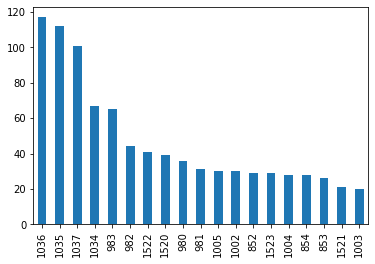

In [108]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

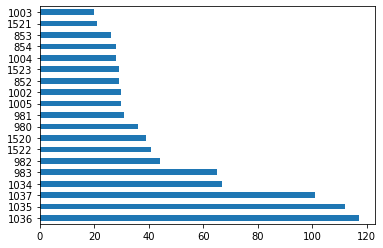

In [111]:
df["LojaID"].value_counts(ascending=False).plot.barh();

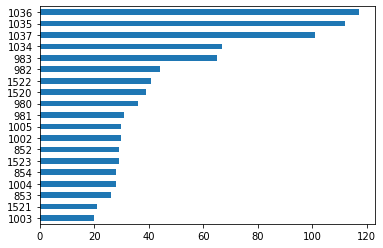

In [112]:
df["LojaID"].value_counts(ascending=True).plot.barh();

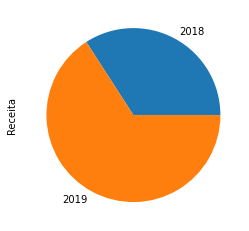

In [114]:
#Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [115]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

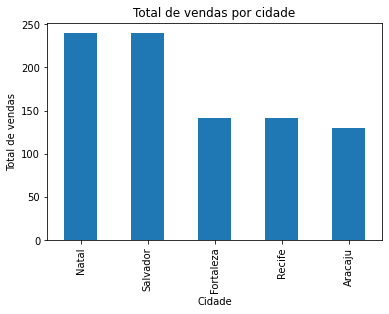

In [120]:
#Adicionando título e alterando nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

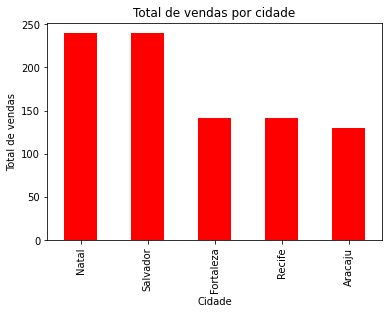

In [121]:
#Alterando cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

In [122]:
#Alterando estilo
plt.style.use("ggplot")

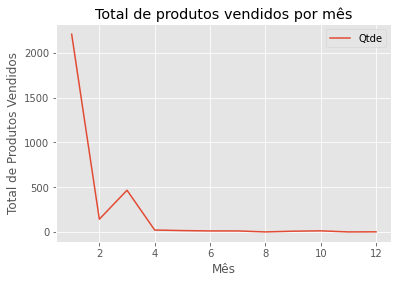

In [126]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title = "Total de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();

In [127]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [129]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

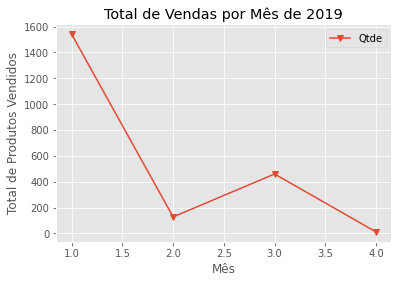

In [131]:
#Total de produtos veniddos por mês
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(title = "Total de Vendas por Mês de 2019", marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();

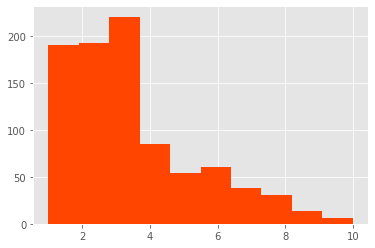

In [133]:
#histograma
plt.hist(df["Qtde"], color="orangered");

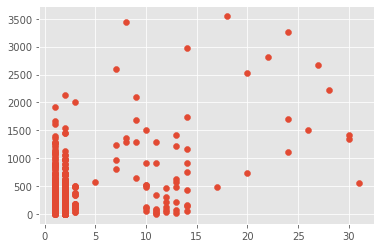

In [135]:
plt.scatter(x=df_2019["Dia_Venda"], y=df_2019["Receita"]);

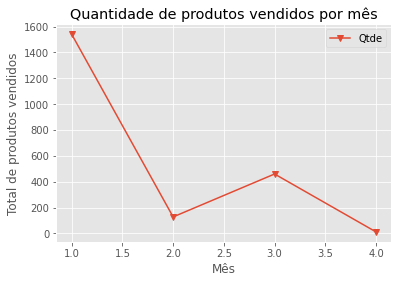

In [136]:
#Salvando PNG
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker="v")
plt.title("Quantidade de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend()
plt.savefig("Grafico qtde x mes.png")